In [ ]:
!pip install catboost


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from catboost import CatBoostClassifier

from xgboost import XGBClassifier

import lightgbm as lgbm

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


In [ ]:
import io
df = pd.read_csv('/content/drive/MyDrive/MetaSynPrj/metabolic_syndrome.csv')
# df = pd.read_csv(io.BytesIO(uploaded['metabolic_syndrome.csv']))
df

,seqn,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,No MetSyn
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,No MetSyn
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,No MetSyn
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,MetSyn


In [ ]:
import pickle

df = df.drop(columns = ['seqn'])

X = df.drop(columns = ['metabolicsyndrome'])
y = df['metabolicsyndrome']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create column selectors.
from sklearn.compose import make_column_transformer, make_column_selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Imputers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Create the numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)

# Create the categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)

# Create tuples for the Column Transformers
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# Create the ColumnTransformer
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='passthrough')


# Fit on Train
pp= preprocessor.fit(X_train)

pickle.dump(pp, open("pp.p", "wb"))
files.download("pp.p")


NameError: ignored

======For Logistic Regression======
Training Accuracy: 84.94791666666667%
Testing Accuracy: 84.40748440748442%
F1 Score: 0.885145482388974


======For K Nearest Neighbors======
Training Accuracy: 83.38541666666667%
Testing Accuracy: 83.78378378378379%
F1 Score: 0.884272997032641


======For Support Vector Classifier======
Training Accuracy: 88.75%
Testing Accuracy: 85.03118503118503%
F1 Score: 0.8881987577639753


======For Decision Tree Classifier======
Training Accuracy: 94.27083333333334%
Testing Accuracy: 85.65488565488566%
F1 Score: 0.8903020667726549


======For Random Forest Classifer======
Training Accuracy: 94.47916666666667%
Testing Accuracy: 88.56548856548856%
F1 Score: 0.9144634525660964


======For Gradient Boosting Classifier======
Training Accuracy: 94.94791666666667%
Testing Accuracy: 88.14968814968816%
F1 Score: 0.909952606635071


======For Ada Boost Classifier======
Training Accuracy: 89.16666666666667%
Testing Accuracy: 86.9022869022869%
F1 Score: 0.9001584786053882

LGBMClassifier(max_depth=2)

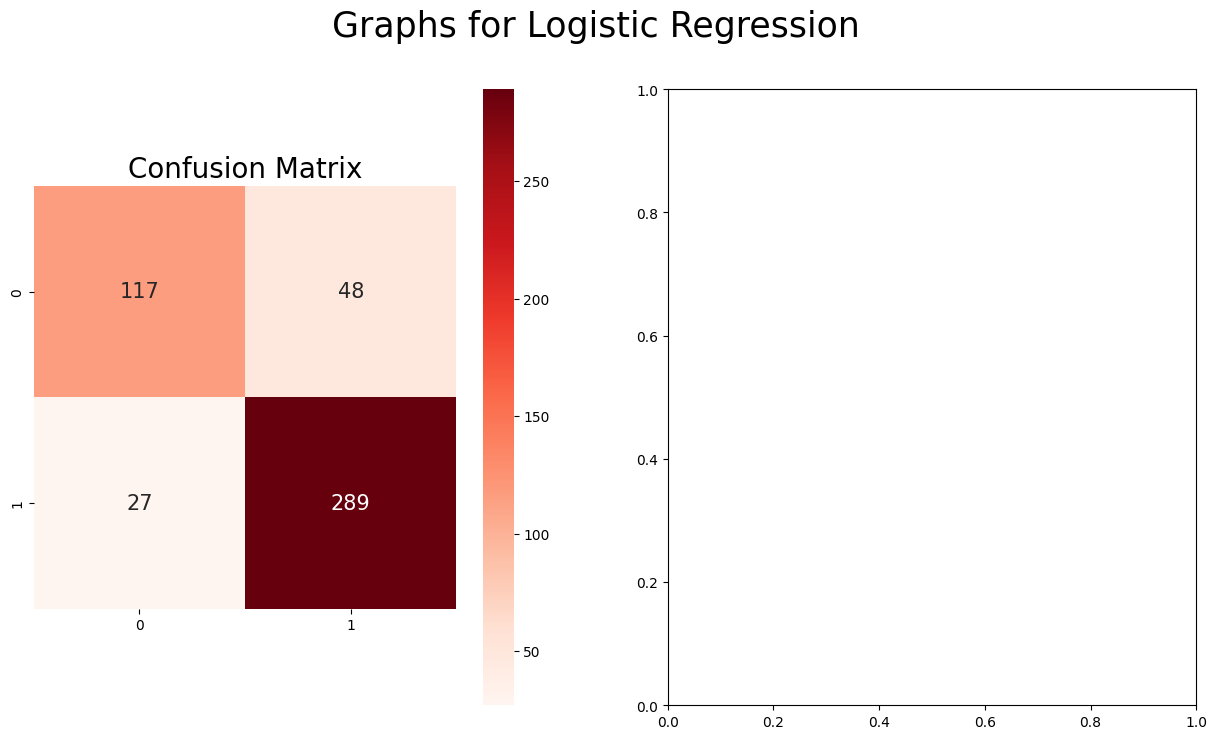

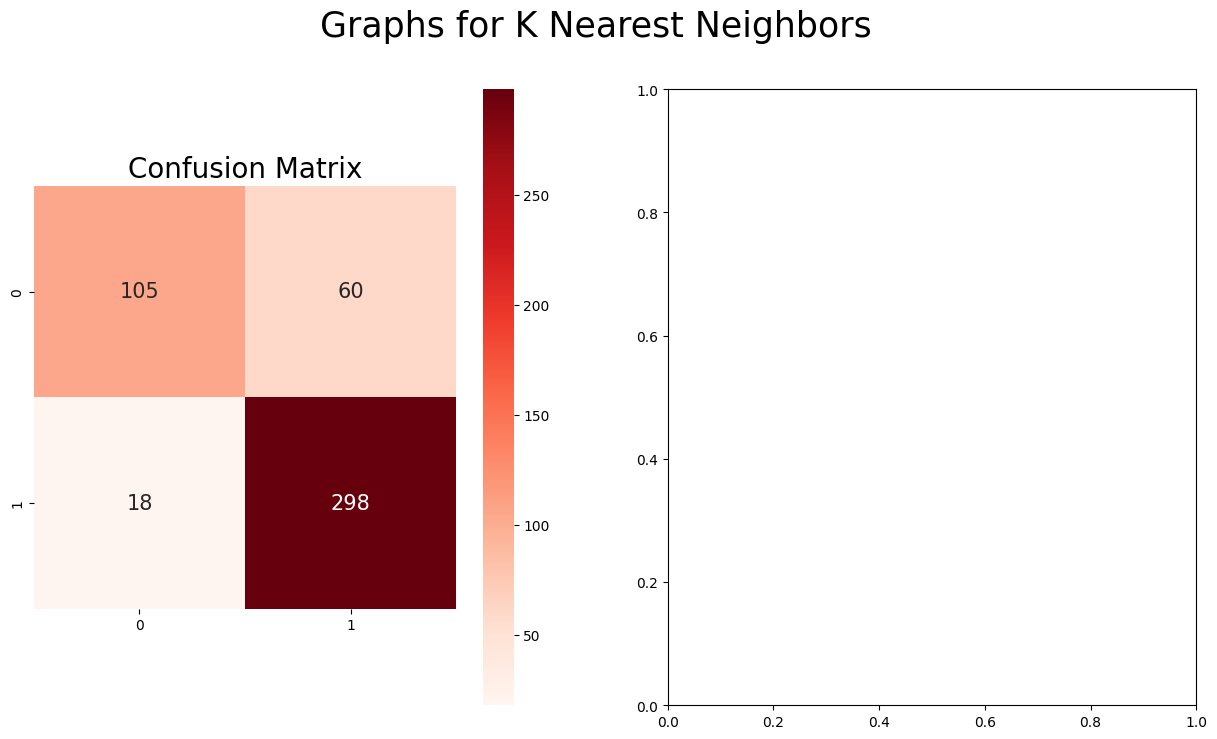

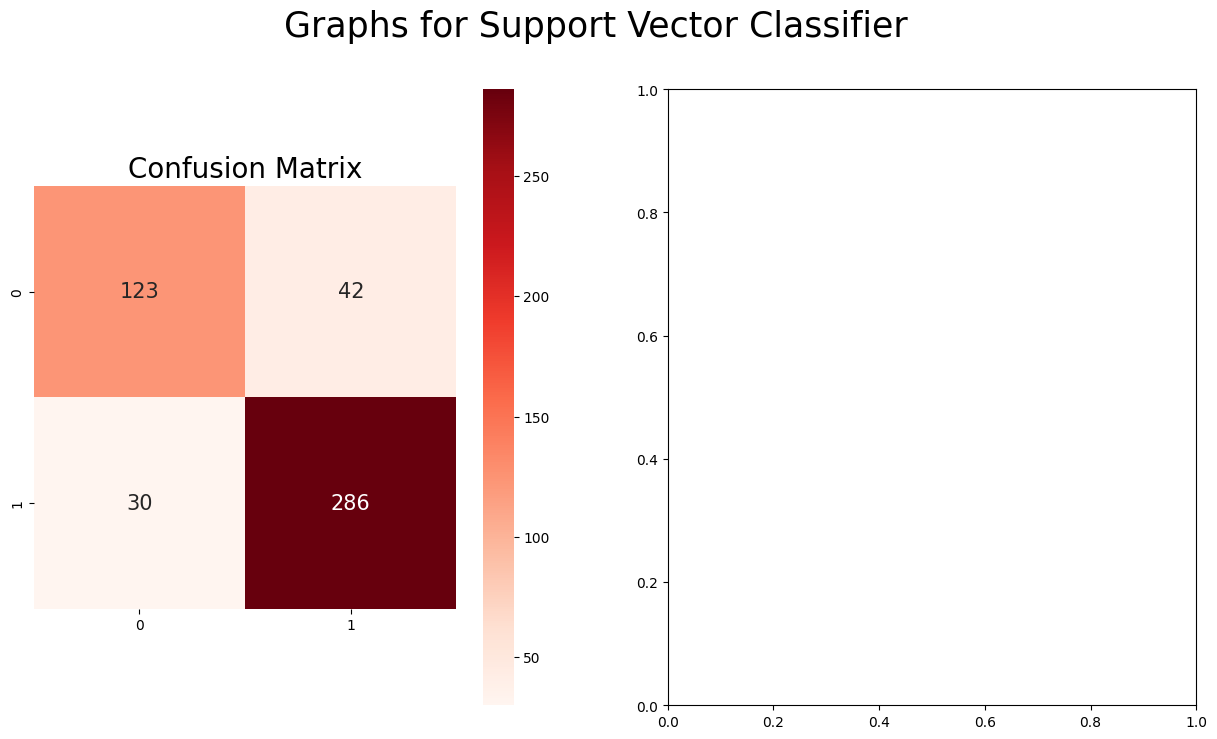

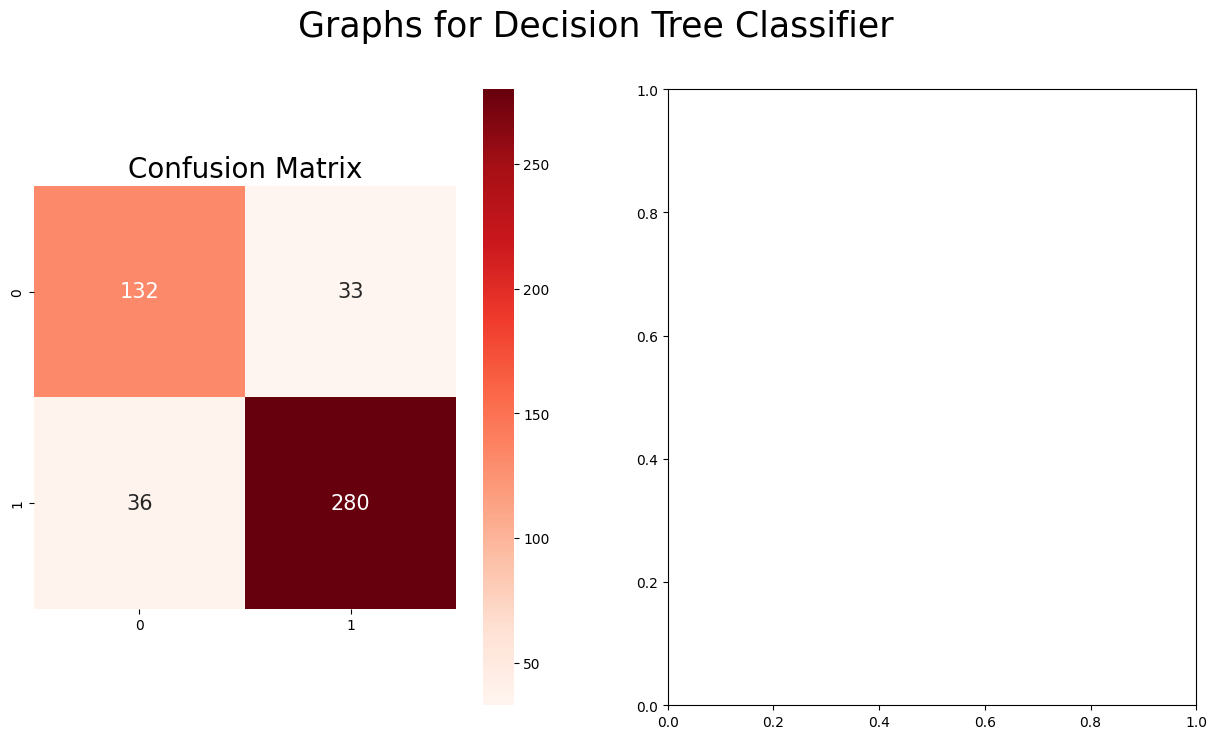

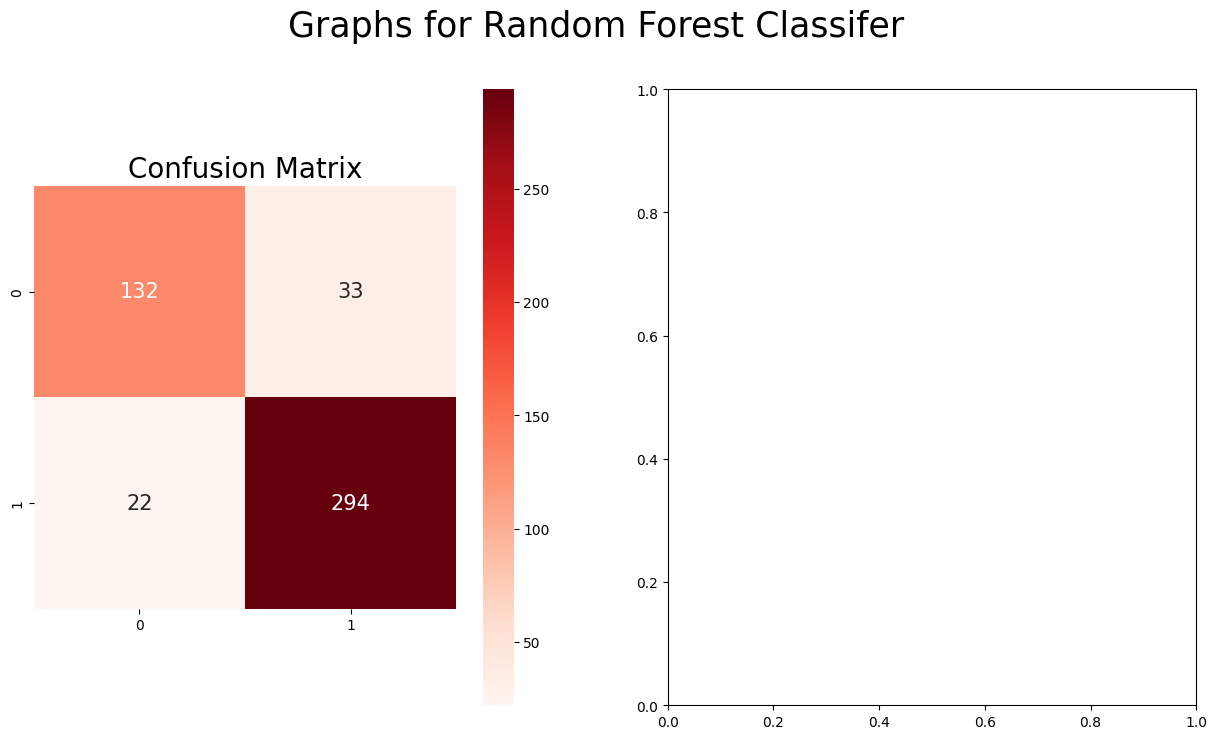

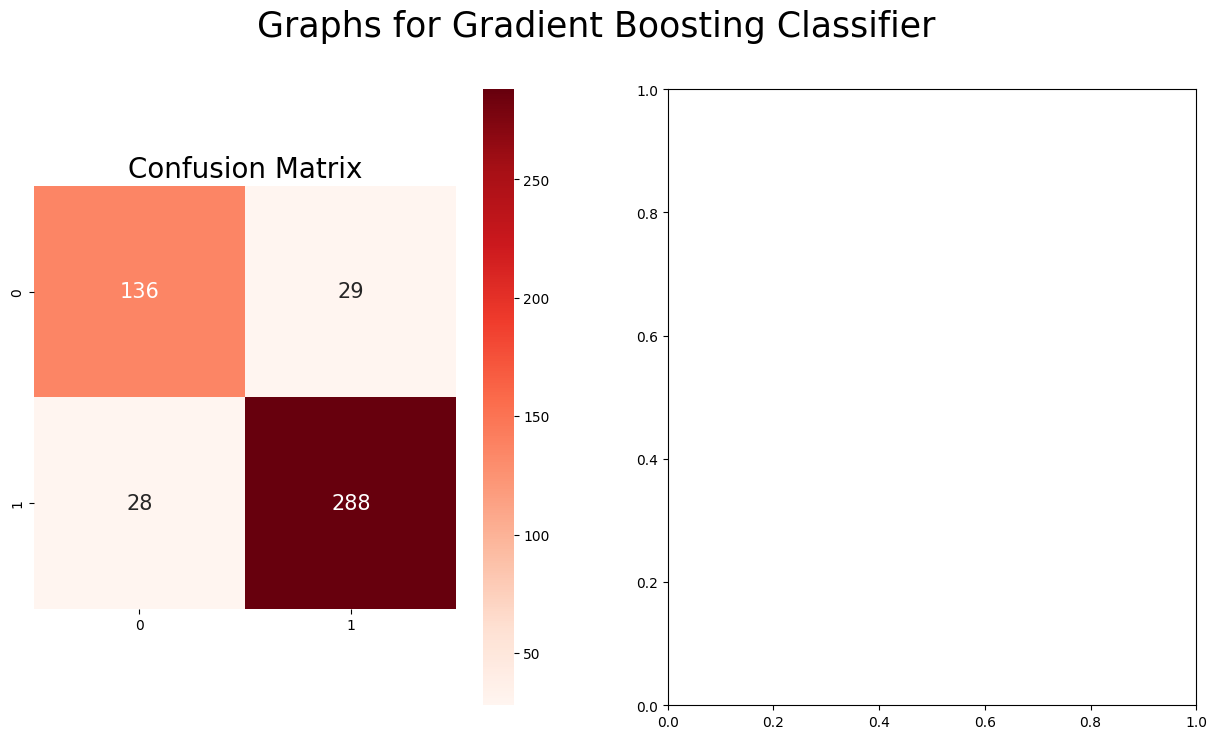

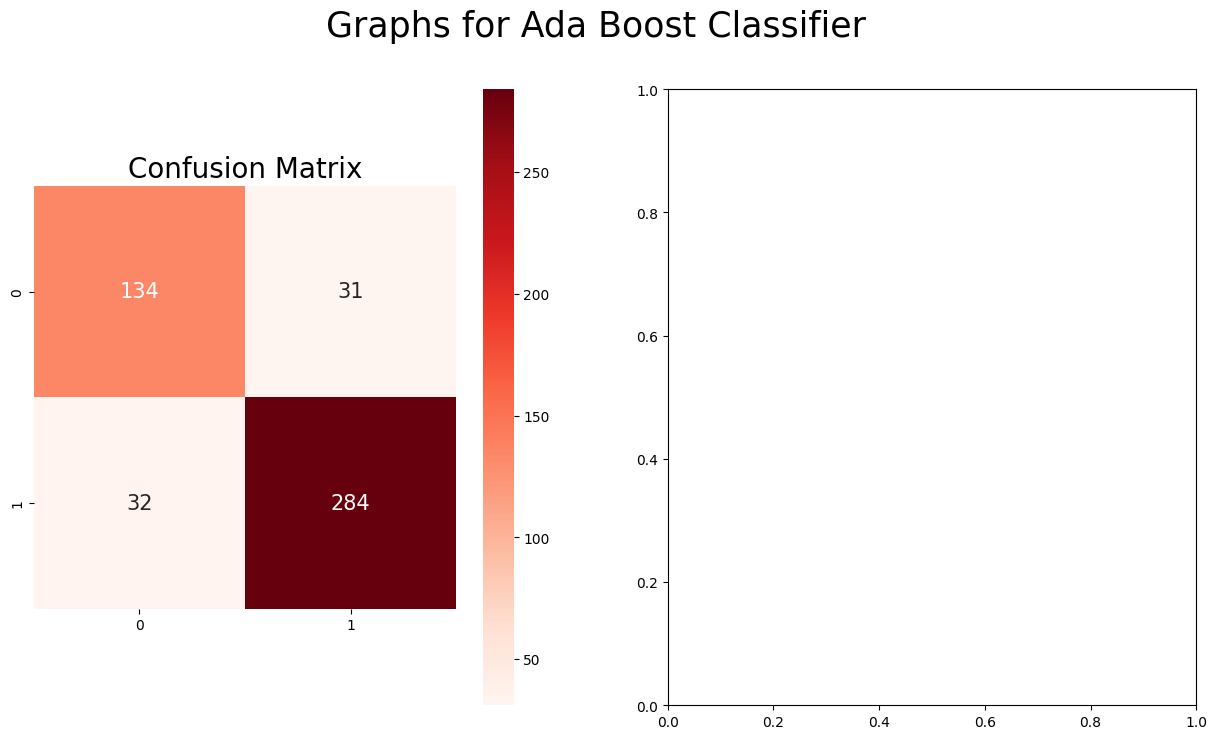

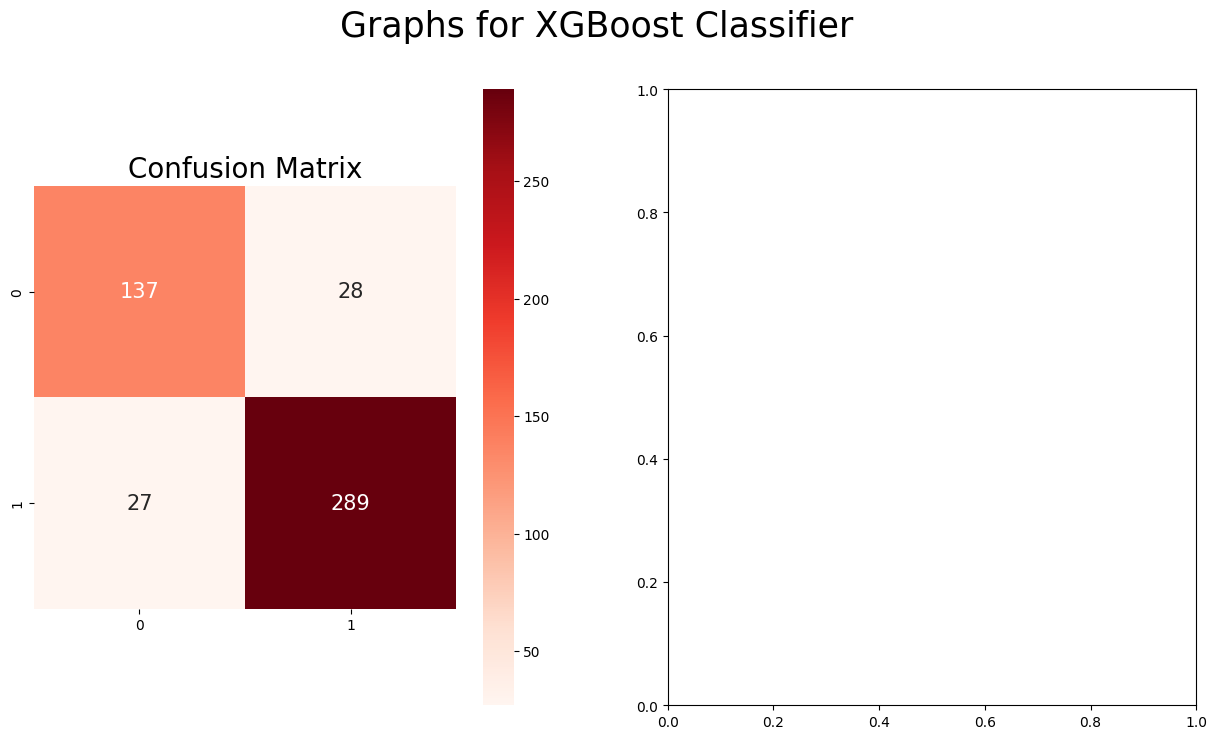

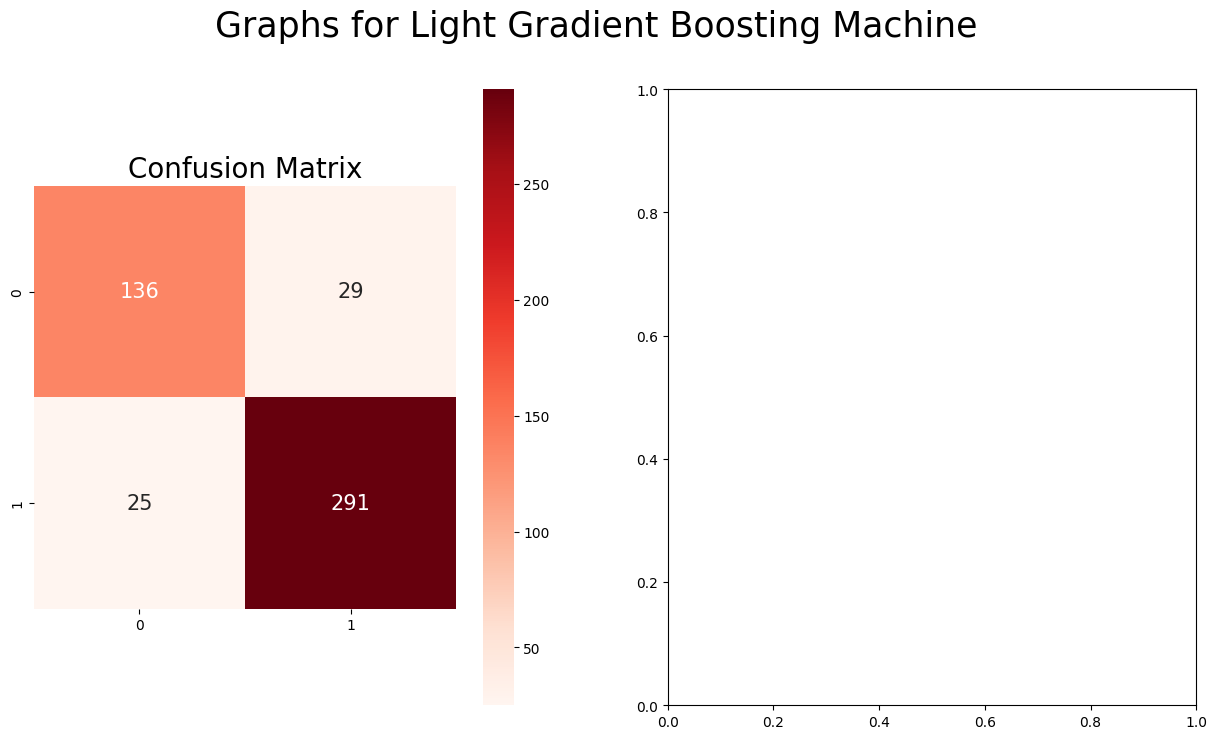

In [ ]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_test_df = pd.DataFrame(X_test_processed)
X_train_df = pd.DataFrame(X_train_processed)


from sklearn.preprocessing import LabelEncoder

algo_name = []
accuracy = []

def display_results_and_graphs(algorithm_name, model): 
    model.fit(X_train_df, y_train_encoded)
    y_pred = model.predict(X_test_df)
    acc_model = model.score(X_test_df, y_test_encoded)
    
    algo_name.append(algorithm_name)
    accuracy.append(acc_model)

    print(f'======For {algorithm_name}======')
    print('Training Accuracy: {}%\nTesting Accuracy: {}%\nF1 Score: {}'.
          format((model.score(X_train_df, y_train_encoded) * 100), 
                 model.score(X_test_df, y_test_encoded) * 100, 
                 f1_score(y_test_encoded, y_pred, labels=[0, 1], pos_label=1)))
    print('\n')
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))
    
    fig.suptitle('Graphs for ' + algorithm_name, fontsize = 25)
    
    sns.heatmap(confusion_matrix(y_test_encoded, y_pred), annot = True, 
                cmap = 'Reds', annot_kws = {'size': 15}, 
                square = True, fmt = '.0f',
                ax = axes[0])
    axes[0].set_title('Confusion Matrix', fontsize = 20)
    
    if 1 not in y_test_encoded:
        return

    return model
    

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



def test_results(algorithm_name, model): 
    model.fit(X_train_df, y_train_encoded)
    y_pred = model.predict(X_test_df)
    acc_model = model.score(X_test_df, y_test_encoded)
    
    algo_name.append(algorithm_name)
    accuracy.append(acc_model)

    print(f'======For {algorithm_name}======')
    print('Training Accuracy: {}%\nTesting Accuracy: {}%\nF1 Score: {}'.
          format((model.score(X_train_df, y_train_encoded) * 100), 
                 model.score(X_test_df, y_test_encoded) * 100, 
                 f1_score(y_test_encoded, y_pred, labels=[0, 1], pos_label=1)))
    print('\n')
    
    if 1 not in y_test_encoded:
        return

    return model
    

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


display_results_and_graphs('Logistic Regression', LogisticRegression())
display_results_and_graphs('K Nearest Neighbors', KNeighborsClassifier(n_neighbors = 13))
display_results_and_graphs('Support Vector Classifier', SVC())
display_results_and_graphs('Decision Tree Classifier', DecisionTreeClassifier(random_state = 13, max_depth = 7))
display_results_and_graphs('Random Forest Classifer', RandomForestClassifier(random_state = 13, max_depth = 7))
display_results_and_graphs('Gradient Boosting Classifier', GradientBoostingClassifier(random_state = 0))
display_results_and_graphs('Ada Boost Classifier', AdaBoostClassifier(random_state = 13))
# display_results_and_graphs('Cat Boost Classifier', CatBoostClassifier(verbose =0))
xgboost = display_results_and_graphs('XGBoost Classifier', XGBClassifier(max_depth = 2))
display_results_and_graphs('Light Gradient Boosting Machine', lgbm.LGBMClassifier(max_depth = 2))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_test.head()

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides
2140,31,Female,Married,2000.0,White,87.8,23.2,0,6.90,3.2,83,61,38
1209,21,Male,Single,800.0,Hispanic,88.1,25.2,0,2.29,5.4,102,36,54
456,50,Female,NaN,8200.0,Black,100.0,28.1,0,5.64,5.3,98,82,83
42,22,Male,NaN,1600.0,White,110.7,32.6,0,8.83,8.0,112,43,178
1283,55,Female,Married,1000.0,Black,99.4,29.9,0,4.19,5.4,54,58,83


In [ ]:
# initialize list of lists
data = [['62','Female','Separated','2500','MexAmerican','92.9','26','0','2.33','3.6','138','31','565']]
# data = [['38','Female','Single','8200','Black','120.7','45.2','0','16.64','5.4','100','37','163']] 

# Create the pandas DataFrame
test = pd.DataFrame(data, columns=['age', 'sex', 'marital', 'income', 'race', 'waistcirc', 'bmi',
       'albuminuria', 'uralbcr', 'uricacid', 'bloodglucose', 'hdl',
       'triglycerides'])
  

In [ ]:
test.shape
X_test_df[:1]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.003067,-0.664644,-0.651106,-0.823674,-0.37177,-0.141003,-1.58641,-0.717583,0.502014,-0.969759,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
import torch
from torchvision import datasets, models, transforms

In [ ]:
def predict(algorithm_name, model,testdf): 
  test_processed = preprocessor.transform(testdf)
  test_df = pd.DataFrame(test_processed)
  model.fit(X_train_df, y_train_encoded)

  y_pred = model.predict(test_df)
  model.save_model('/content/drive/MyDrive/MetaSynPrj/prediction.json')
  # for i in range(len(test_df)):
  #   if y_pred[i] == 1:
  #     print(f"Instance {i+1}: Positive")
  #   else:
  #     print(f"Instance {i+1}: Negative")
  if y_pred[0]==1:
    print("Negative")
  else:
    print("Positive")  


In [ ]:
import xgboost as xgb
loaded_model = xgb.Booster({'nthread': 2})
loaded_model.load_model('/content/drive/MyDrive/MetaSynPrj/prediction.json')

In [ ]:
print("TEST",test)
test_processed = preprocessor.transform(test)
print(test_processed)
test_df = pd.DataFrame(test_processed)
y = loaded_model.predict(xgb.DMatrix(test_df))
print("DF",test_df)
print(xgb.DMatrix(test_df))
print(y)

TEST   age     sex    marital income         race waistcirc bmi albuminuria  \
0  62  Female  Separated   2500  MexAmerican      92.9  26           0   

  uralbcr uricacid bloodglucose hdl triglycerides  
0    2.33      3.6          138  31           565  
[[ 0.75921414 -0.49276267 -0.32966154 -0.40045769 -0.37177019 -0.15969194
  -1.308841    0.83965538 -1.47271966  4.68956071  1.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          1.          0.          0.        ]]
DF          0         1         2         3        4         5         6   \
0  0.759214 -0.492763 -0.329662 -0.400458 -0.37177 -0.159692 -1.308841   

         7        8         9   ...   13   14   15   16   17   18   19   20  \
0  0.839655 -1.47272  4.689561  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   

    21   22  
0  0.0  0.0  

[1 rows x 23 columns]
[0.00069448]


# New Section

In [ ]:
predict('XGBoost Classifier', XGBClassifier(max_depth = 2),test)

Positive
